In [7]:
import pandas as pd
import numpy as np
from sklearn import metrics
import os
import glob
import seaborn as sns


In [8]:
data = pd.DataFrame(columns=['name', 'error_b','error_m'])
for csv in glob.glob(r'result\a*.csv'):
    data = data.append(pd.read_csv(csv, names=['name','error_b','error_m']))

In [9]:
data.describe()

,error_b,error_m
count,1290.000000,1290.000000
mean,9.599169,0.313083
std,1.445719,0.188505
min,6.963424,0.003292
25%,8.211981,0.166249
50%,9.647799,0.289137
75%,10.529331,0.426390
max,17.269900,1.035464


In [10]:
data['status'] = data['name'].str.split('_').apply(lambda x: x[0])
data['id'] = data['name'].str.split('_').apply(lambda x: x[2])
data.head(5)

,name,error_b,error_m,status,id
0,normal_id_00_00000000.wav,7.953116,0.493028,normal,00
1,normal_id_00_00000001.wav,8.258068,0.358482,normal,00
2,normal_id_00_00000002.wav,9.010792,0.128551,normal,00
3,normal_id_00_00000003.wav,7.473969,0.652239,normal,00
4,normal_id_00_00000004.wav,7.632201,0.520920,normal,00


In [11]:
from sklearn.preprocessing import StandardScaler
#
# X=data[['error_b','error_m']].values
# sc=StandardScaler()
# X=sc.fit_transform(X)
data_na = data
# data_na[['error_b','error_m']]=X
print(data_na.head())

                        name   error_b   error_m  status  id
0  normal_id_00_00000000.wav  7.953116  0.493028  normal  00
1  normal_id_00_00000001.wav  8.258068  0.358482  normal  00
2  normal_id_00_00000002.wav  9.010792  0.128551  normal  00
3  normal_id_00_00000003.wav  7.473969  0.652239  normal  00
4  normal_id_00_00000004.wav  7.632201  0.520920  normal  00


00 auc =  0.9717415730337079  pauc =  0.8638379657007689
02 auc =  0.8415355805243445  pauc =  0.6615414941849005
04 auc =  0.9741573033707865  pauc =  0.8639858072146659
06 auc =  0.8438202247191011  pauc =  0.5227675931401538
Ave auc=  0.907813670411985 pauc=  0.7280332150601223


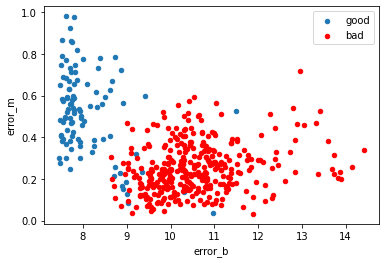

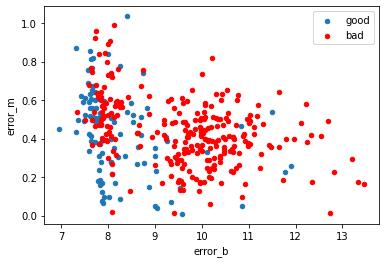

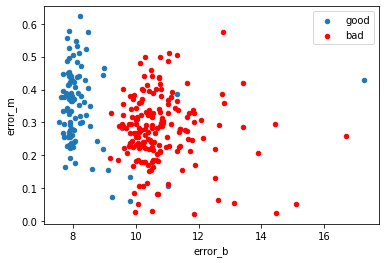

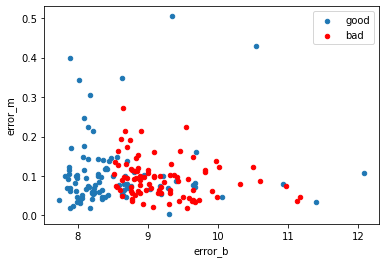

In [13]:
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
ids=['00','02','04','06']
aucs=[]
paucs=[]
for id in ids:
    model= OneClassSVM(coef0=0.1,gamma='auto')
    dataplot=data_na[(data_na['id'] == id)][['status','error_b','error_m']]
    y_true=dataplot['status']
    y_true=y_true.replace('normal', -1)
    y_true=y_true.replace('anomaly', 1)
    y_true=y_true.values
    dataplot['ers']=dataplot['error_b'].values+dataplot['error_m'].values
    X=dataplot['ers'].values

    auc = metrics.roc_auc_score(y_true, X)
    aucp=metrics.roc_auc_score(y_true, X,max_fpr=0.1)
    aucs.append(auc)
    paucs.append(aucp)
    print(id, 'auc = ',auc,' pauc = ',aucp)
    ax=dataplot[(dataplot['status'] == 'normal')].plot( kind='scatter',x='error_b',y='error_m', label="good")
    dataplot[(dataplot['status'] == 'anomaly')].plot( color='red',kind='scatter',x='error_b',y='error_m', label="bad",ax=ax)
print('Ave auc= ', np.mean(aucs),'pauc= ',np.mean(paucs))